## Train QuickNAT
Working code! Details coming soon!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from networks.quickNAT import quickNAT
from networks.data_utils import get_imdb_data

#torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
#%load_ext autoreload
#%autoreload 2

In [2]:

train_data, test_data = get_imdb_data()
print("Train size: %i" % len(train_data))
print("Test size: %i" % len(test_data))

(3240, 256, 256)
27.0
0.0
Train size: 1890
Test size: 1350


In [3]:
from networks.quickNAT import quickNAT
from networks.solver import Solver


train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=4)

param ={
        'num_channels':1,
        'num_filters':64,
        'kernel_h':5,
        'kernel_w':5,
        'kernel_c': 1,
        'stride_conv':1,
        'pool':2,
        'stride_pool':2,
        'num_class':28
    }

exp_dir_name = 'Exp02_try2'

quicknat_model = quickNAT(param)
solver = Solver(optim_args={"lr": 1e-2})
solver.train(quicknat_model, train_loader, val_loader, log_nth=1, num_epochs=10, exp_dir_name=exp_dir_name)


START TRAIN.


/home/deeplearning/Abhijit/Git Projects/quickNAT_pytorch/networks/net_api/losses.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input_soft = F.softmax(input)


[Iteration : 0] : 5.338991641998291
[Iteration : 50] : 1.196690559387207
[Iteration : 100] : 1.1790229082107544
[Iteration : 150] : 1.1515096426010132
[Iteration : 200] : 1.103614330291748
[Iteration : 250] : 1.0938990116119385
[Iteration : 300] : 1.1703295707702637
[Iteration : 350] : 1.0792620182037354
[Iteration : 400] : 1.0680567026138306
[Iteration : 450] : 1.103791356086731
[Epoch : 0/10] : 1.0787193775177002
Saving model... models/Exp02_try2/quicknat_epoch1.model
[Iteration : 0] : 1.0534029006958008
[Iteration : 50] : 1.0029174089431763
[Iteration : 100] : 1.0416001081466675
[Iteration : 150] : 1.0930482149124146
[Iteration : 200] : 1.0595065355300903
[Iteration : 250] : 1.0332890748977661
[Iteration : 300] : 1.0458155870437622
[Iteration : 350] : 1.0133975744247437
[Iteration : 400] : 1.018371820449829
[Iteration : 450] : 1.0022300481796265
[Epoch : 1/10] : 1.0380741357803345
Saving model... models/Exp02_try2/quicknat_epoch2.model
[Iteration : 0] : 1.0111743211746216
[Iteration

## Save the Model

When you are satisfied with your training, you can save the model.

In [ ]:
quicknat_model.save("models/quicknat_model.model")

# Deploy Model on Test Data

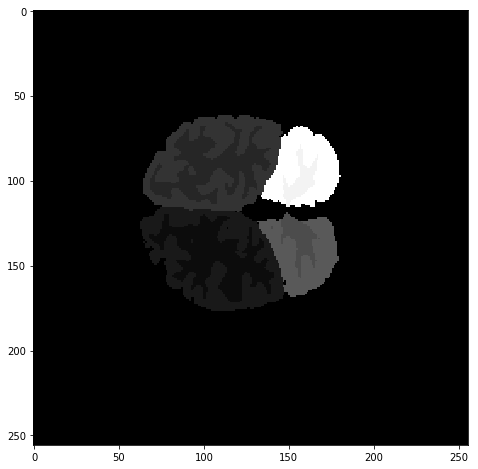

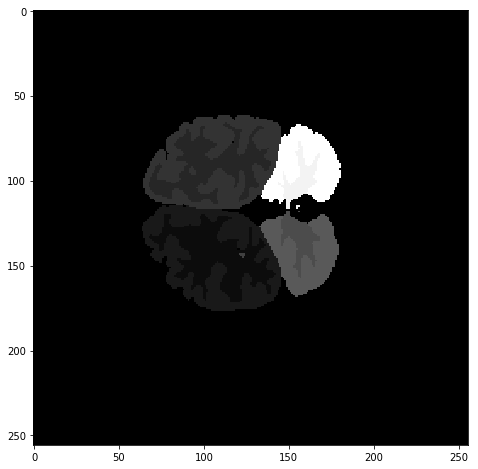

In [41]:
import matplotlib.pyplot as plt

quick_model = torch.load('models/Exp02_try2/quicknat_epoch10.model')

out = quicknat_model(Variable(torch.Tensor(test_data.X[200:201]).cuda(),volatile=True))
max_val, idx = torch.max(out,1)
idx = idx.data.cpu().numpy()
idx = np.squeeze(idx)
plt.imshow(idx)
plt.show()

img_test = test_data.y[200:201]
img_test = np.squeeze(img_test)
plt.imshow(img_test)
plt.show()